<a href="https://colab.research.google.com/github/joanjeremiah/Natural-Language-Processing/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural Language Processing Project

I will be using the Yelp Review Data Set from Kaggle.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

##Importing Libraries

In [1]:
import numpy as np
import pandas as pd

#The Data
Reading the yelp.csv file and setting it as a dataframe called yelp.

In [2]:
yelp = pd.read_csv('/content/drive/MyDrive/datasets/yelp.csv')

Checking head, info and describe of dataframe yelp

In [4]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Creating a new column text length to store the length of text

In [7]:
yelp['text length'] = yelp['text'].apply(len)

In [10]:
yelp['text length']

0        889
1       1345
2         76
3        419
4        469
        ... 
9995     668
9996     881
9997    1425
9998     880
9999     461
Name: text length, Length: 10000, dtype: int64

Checking the no. of unique values in the column type and dropping the column since it does not contribute anything

In [11]:
yelp['type'].nunique()

1

In [13]:
yelp.drop('type',axis=1,inplace=True)

#EDA
Exploring the data

##Importing data visualisation libraries

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Creating a countplot of the number of occurrences for each type of star rating.

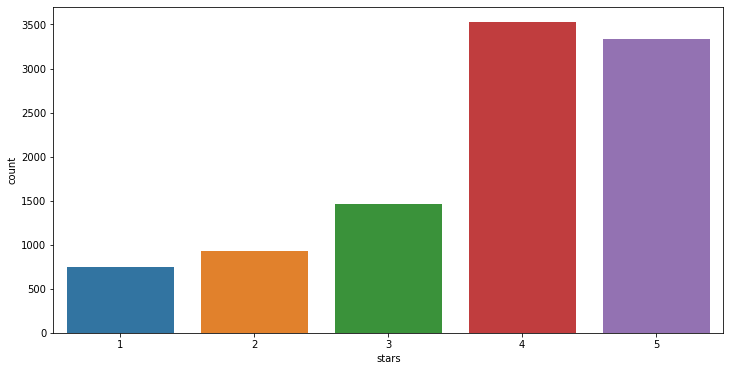

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='stars',data=yelp)

Creating a boxplot of text length for each star category.

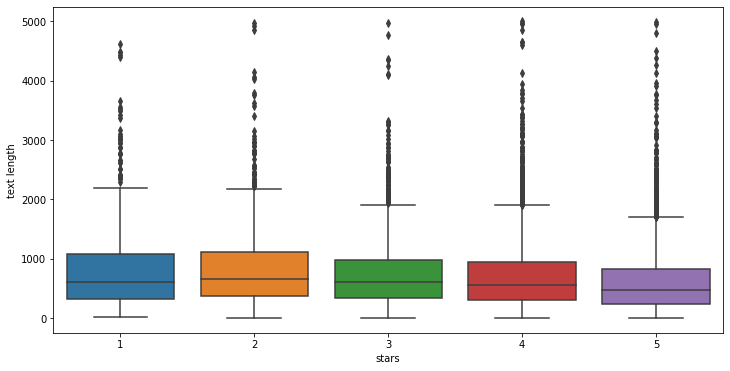

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'stars',y='text length',data=yelp)

Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.

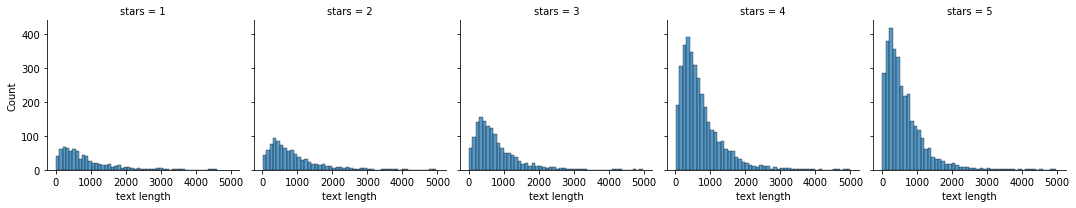

In [32]:
g = sns.FacetGrid(yelp,col="stars")
g.map(sns.histplot,'text length',bins=50)

**Using groupby to get the mean values of the numerical columns**

In [37]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Using the corr() method on that groupby dataframe to produce this dataframe:

In [36]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


Using seaborn to create a heatmap based off that .corr() dataframe:

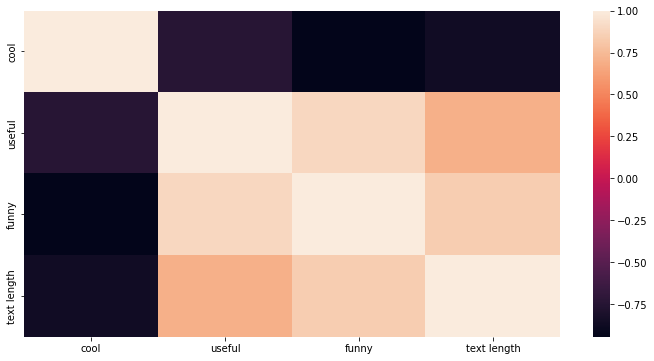

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(data=stars.corr())

#NLP Classification Task
Creating a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [48]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.head(3)

,business_id,date,review_id,stars,text,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0,419


In [49]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   user_id      4086 non-null   object
 6   cool         4086 non-null   int64 
 7   useful       4086 non-null   int64 
 8   funny        4086 non-null   int64 
 9   text length  4086 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 351.1+ KB


**Creating two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class.**

In [50]:
X = yelp_class['text']
y = yelp_class['stars']

Importing CountVectorizer and creating a CountVectorizer object.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
cv = CountVectorizer()

**Using the fit_transform method on the CountVectorizer object and pass in X (the 'text' column).**

In [53]:
X = cv.fit_transform(X)

#Train Test Split
Splitting our data into training and testing data.

**Using train_test_split to split up the data into X_train, X_test, y_train, y_test.**

In [54]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#Training a Model

**Importing MultinomialNB and creating an instance of the estimator**

In [59]:
from sklearn.naive_bayes import MultinomialNB

In [60]:
nb = MultinomialNB()

In [61]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#Predictions and Evaluations

Using the predict method off of nb to predict labels from X_test.

In [62]:
predictions = nb.predict(X_test)

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       181
           5       0.98      0.93      0.96      1045

    accuracy                           0.93      1226
   macro avg       0.84      0.91      0.87      1226
weighted avg       0.94      0.93      0.93      1226



In [65]:
print(confusion_matrix(predictions,y_test))

[[159  22]
 [ 69 976]]


#Using Text Processing
**Importing TfidfTransformer and Pipeline from sklearn.**

In [67]:
from sklearn.pipeline import Pipeline

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

**Creating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [77]:
pipe = Pipeline([
   ('bow',CountVectorizer()),
   ('tfid',TfidfTransformer()),
   ('model',MultinomialNB())              
])

#Using the Pipeline

In [70]:
X = yelp_class['text']
y = yelp_class['stars']

##Train Test Split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [78]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfid',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

##Predictions

In [79]:
predictions = pipe.predict(X_test)

In [80]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       1.00      0.81      0.90      1226

    accuracy                           0.81      1226
   macro avg       0.50      0.41      0.45      1226
weighted avg       1.00      0.81      0.90      1226



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
print(confusion_matrix(predictions,y_test))

[[  0   0]
 [228 998]]
